# ***Regression: The Diabetes dataset***

---



Applying Exploratory Data Analysis to analyze and investigate the Diabetes dataset.
Choosing a set of algorithms to compare, selecting the best model and evaluating this model.

In [ ]:
import pandas as pd       # load libraries
import numpy as np
from sklearn.datasets import load_diabetes      # load dataset
diabetes = load_diabetes()
df = pd.DataFrame(np.c_[diabetes['data'], diabetes['target']],
                  columns= np.append(diabetes['feature_names'], ['target']))

**Exploratory Analysis**

---
**Dimensions of the data**

In [ ]:
df.shape     # number of rows,columns

(442, 11)

**Data Type of each attribute**

In [ ]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


**Statistical properties for each attribute**

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


**Class Distribution**

In [ ]:
df.groupby('target').size()    

target
25.0     1
31.0     1
37.0     1
39.0     2
40.0     1
        ..
321.0    1
332.0    1
336.0    1
341.0    1
346.0    1
Length: 214, dtype: int64

**Univariate plots**

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
h = df.hist(ax=ax)
plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


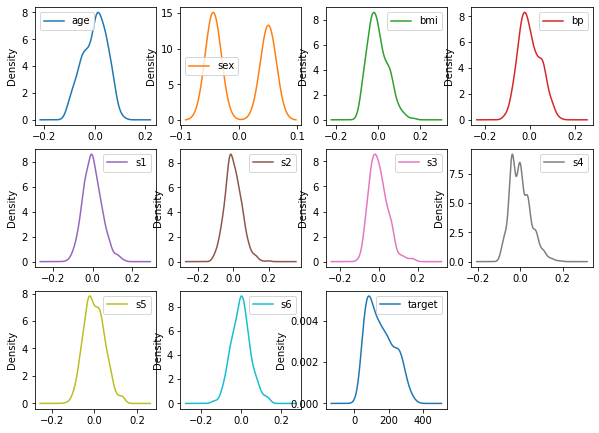

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

In [ ]:
bp = df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,  figsize=(10,10))
plt.show()

<IPython.core.display.Javascript object>

**Multivariate plots**

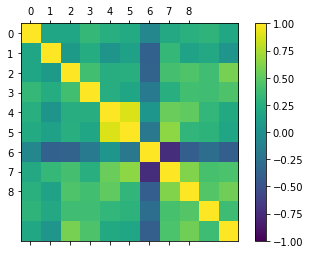

In [ ]:
correlations = df.corr()      # correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [ ]:
import seaborn as sns       # heatmap
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(correlations, annot = True, ax=ax)

<IPython.core.display.Javascript object>

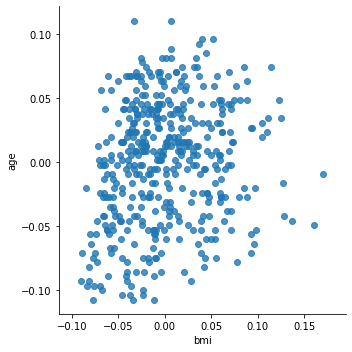

In [ ]:
sns.lmplot(data=df, y='age', x='bmi', hue= None, fit_reg=False)        # scatter plot between two variables

In [ ]:
from pandas.plotting import scatter_matrix      # scatterplot matrix
scatter_matrix(df, figsize = (10,10))
plt.show()

<IPython.core.display.Javascript object>

**Algorithm comparison and selection**

---



In [ ]:
from sklearn.model_selection import KFold         # k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing       # import the preprocessing package to standardize data along the 'target' variable
                                        # the rest of the dataset has already been standardized to have mean 0 and squared length = 1
array = df.values     # create the 10 folds
X = array[:,0:10]
Y = array[:,10]
Y = preprocessing.scale(Y)        # standardize Y-axis

In [ ]:
# compare a set of regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
models = []       # create a list, with one item per algorithm
models.append(('LR', LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVM', SVR(gamma='scale')))

In [ ]:
scoring = 'neg_mean_squared_error'      # the scoring function

In [ ]:
# evaluate classifiers
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -0.505976 (+/- 0.114973)
     RIDGE: -0.567386 (+/- 0.102610)
     LASSO: -1.006244 (+/- 0.196293)
   ELASTIC: -1.006244 (+/- 0.196293)
       kNN: -0.634875 (+/- 0.125315)
        DT: -1.158169 (+/- 0.206996)
       SVM: -0.533673 (+/- 0.105569)


In [ ]:
%matplotlib notebook

plt.boxplot(results)      # plot the results
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

<IPython.core.display.Javascript object>

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split      # split the dataset into training/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
linearmodel = LinearRegression()     # select linear regression as the winning algorithm 
print(linearmodel.fit(X_train, Y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
Y_pred = linearmodel.predict(X_test)     # predict the results

**Evaluate the model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# coefficients and mean squared error
print('Coefficients: \n', linearmodel.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [-0.39765451 -3.53550912  6.86759718  4.25556154 -7.54507503  4.32387037
 -0.36329837  1.80875451  8.63669591  0.80391357]
Mean squared error: 0.50
Variance score: 0.44
